## School Safety Unvelied
### Data Storytelling Project by Lucas Drinen

The goal of this project is to look at two different datasets and attempt to determine whether or not increased security measures are required in urban schools. You may have noticed that schools in urban areas tend to have more increased security measures such as metal detectors, and a clear bookbag requirement, but are these measures necessary, or are they misallocated? Do urban schools really require more security measures than non-urban schools? 

As a former city high school student who's school did not implement metal detectors and school police until senior year, I believe that these kinds of measures are unnecessary, but lets allow the data to speak for itself.

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### The First Dataset 
The first dataset contains all major school shootings since 1999, their location, along with other information.

#### Alterations 
First I used excel to make the dataset a bit easier to work with. I added a column for "population", and used the geography feature to autofill for all 400+ rows. Next I created another column named "Urban". According to the US Census, areas with a population of 50,000 or more are considered to be "urbanized", so I used that definition to determine whether or not an area was urban or not-urban(U.S. Census Bureau, n.d.). I marked urban areas with a 2 and non-urban with a 1 to make it a bit easier to work with.

I also dropped irellevant columns such as the time of the shooting.

### Data Dictionary
#### This data dictionary defines the relevant columns. Irrelevant columns have been dropped from the dataframe.
#### Dataset 1 - Shootings.csv

1. School_name - Name of the school where the shooting occured.
2. City
3. State
4. Population - Values higher than 50,000 are considered urbanized according to the US Census.
5. School_type - Public, Private, or Charter
6. Enrollment - Number of students at the school
7. Urban - 2 = urban, 1 = not urban (suburban, rural), According to population column.
#### Dataset 2 - SchoolSafetyMeasures.csv
8. RandomMDC - Random metal detector checks
9. DailyMDC - Daily metal detector checks
10. RandomCS - Random contraband searches
11. Bookbag Restrictions - Bookbags are banned or clear.

In [221]:
shootings = pd.read_csv('shootings.csv')
columns_to_keep = ['city','state','population','urban','school_type','enrollment','school_name','year']
shootings = shootings[columns_to_keep]
shootings.drop(columns=shootings.columns.difference(columns_to_keep), inplace=True)
shootings['urban'] = shootings['urban'].map({'Y': 2, 'N': 1})


shootings = shootings[shootings['urban'] != '#FIELD!']
shootings.drop(shootings[shootings['urban'] == '#FIELD!'].index, inplace=True)

shootings = shootings[shootings['population'] != '#FIELD!']
shootings.drop(shootings[shootings['population'] == '#FIELD!'].index, inplace=True)

shootings['population'] = shootings['population'].str.replace(',', '').astype(float)


shootings.head()

,city,state,population,urban,school_type,enrollment,school_name,year
0,"Littleton, Colorado",Colorado,45652.0,1.0,public,1965,Columbine High School,1999
1,"Baton Rouge, Louisiana",Louisiana,227470.0,2.0,public,588,Scotlandville Middle School,1999
2,"Conyers, Georgia",Georgia,17305.0,1.0,public,1369,Heritage High School,1999
3,Philadelphia,Pennsylvania,1603797.0,2.0,public,3147,John Bartram High School,1999
4,Boston,Massachusetts,675647.0,1.0,public,1116,Dorchester High School,1999


In [222]:
length = len(shootings)
print("Length of the DataFrame:", length)

Length of the DataFrame: 359


### Visuals

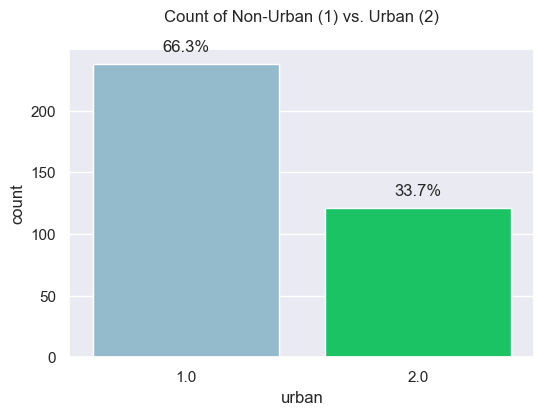

In [226]:
sns.set(style="darkgrid")
plt.figure(figsize=(6, 4))

custom_colors = ["#89BFD6","#00DF62"] 
ax = sns.countplot(data=shootings, x='urban', palette=custom_colors)
plt.title('Count of Non-Urban (1) vs. Urban (2)', pad=20) 

total = float(len(shootings))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height() + 10

    if y > max(p.get_height() for p in ax.patches):
        y = max(p.get_height() for p in ax.patches) + 10
    
    ax.annotate(percentage, (x, y), fontsize=12)
    
plt.show()

Here we can see that non-urban areas(in blue)are where approx. 2/3's of school shootings since 1999 occured. Based on this data, it looks like school shootings are significantly more likely to occur in non-urban areas.

### Dataset 2
(See data dictionary above)
This second dataset from the National Center for Education Statistics shows school security measures in different location types (Urban, Suburban, Town, and Rural). 
#### Alterations
This dataset was a messy excel file that was unnecesssarily difficult to visualize. I decided to take the relevant values from the dataset and create a new CSV file with a more user-friendly format. This made visualizing much easier.

In [185]:
safety = pd.read_csv('SchoolSafetyMeasures.csv')

safety.head()

,Unnamed: 0,Random MDC,Daily MDC,Random CS,Bookbag Restrictions
0,Urban,8.8,5.6,10.8,4.7
1,Suburban,3.8,0.4,8.2,2.5
2,Town,3.1,0.0,14.9,5.7
3,Rural,1.5,0.6,16.0,3.9


Below are visualizations for each of the rows. 

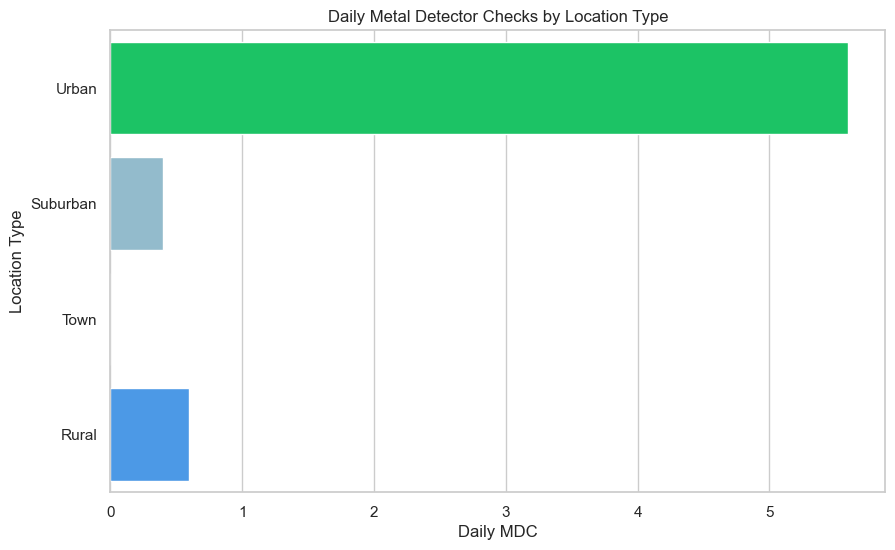

In [181]:
safety.reset_index(inplace=True)
custom_colors = ["#00DF62", "#89BFD6","#8993D6","#3399FF"]

plt.figure(figsize=(10, 6))
sns.barplot(x='Daily MDC', y='Unnamed: 0', data=safety, orient='h', palette=custom_colors)
plt.xlabel('Daily MDC')
plt.ylabel('Location Type')
plt.title('Daily Metal Detector Checks by Location Type')
plt.show()

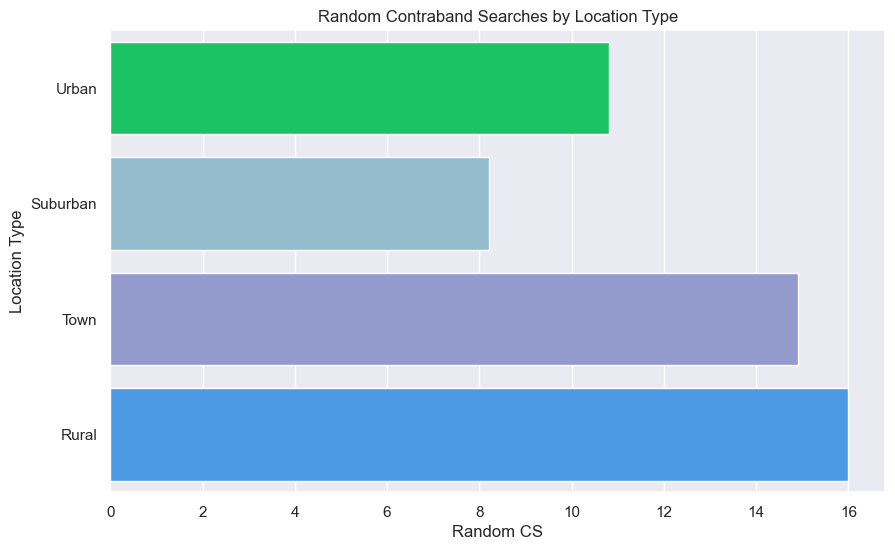

In [139]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Random CS', y='Unnamed: 0', data=safety, orient='h', palette=custom_colors)
plt.xlabel('Random CS')
plt.ylabel('Location Type')
plt.title('Random Contraband Searches by Location Type')
plt.show()

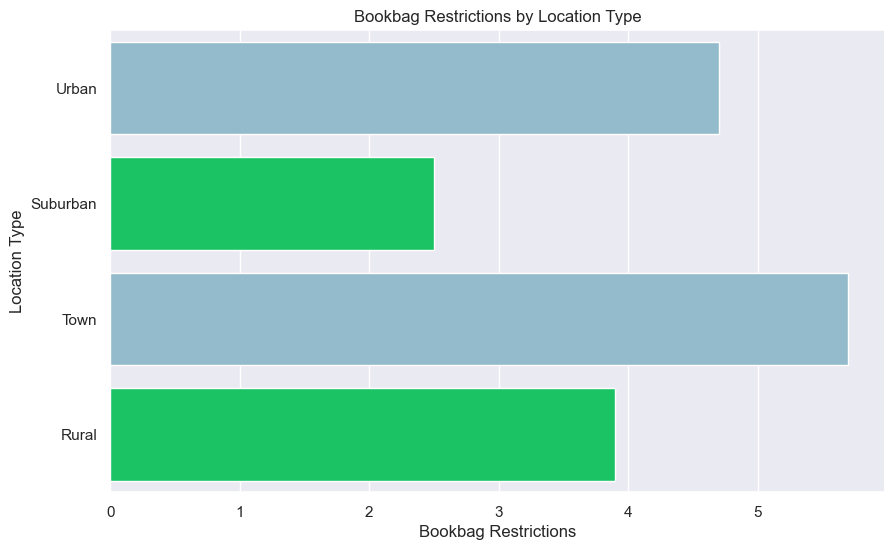

In [186]:
safety.reset_index(inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Bookbag Restrictions', y='Unnamed: 0', data=safety, orient='h', palette=custom_colors)
plt.xlabel('Bookbag Restrictions')
plt.ylabel('Location Type')
plt.title('Bookbag Restrictions by Location Type')
plt.show()

##### Stacked Bar Chart
I orignally wanted to visualize all of the datapoints using a grouped bar graph, but I ran into many errors, so i decided to use what I'd consider to be an equally as effective chart. 

As we can see, a higher number of schools in Towns implement Bookbag Restrictions, while both Towns and Rural areas have the highest values for Random Contraband searches, which sort of disproves my hypothesis. However, when stacked up, urban areas still implement the most security measures.

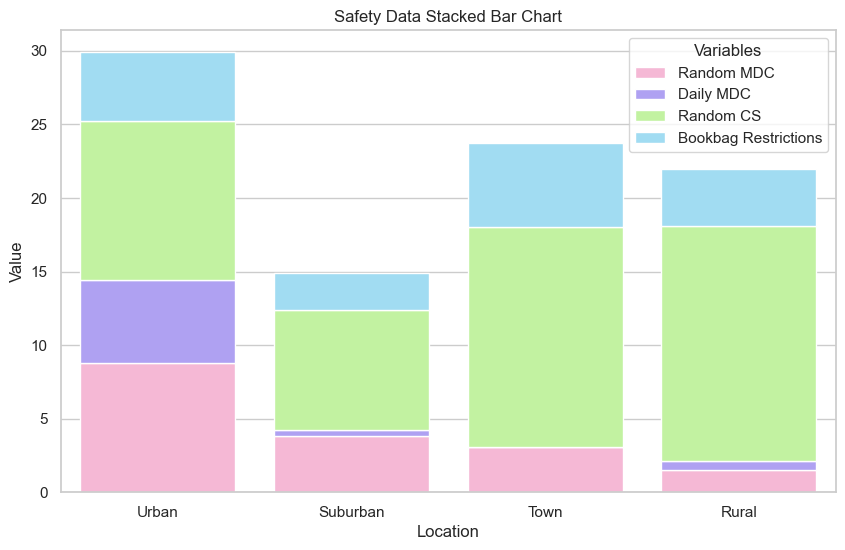

In [201]:
plt.figure(figsize=(10, 6)) 



sns.set(style='whitegrid') 
sns.barplot(x=safety.index, y=safety['Random MDC'], label='Random MDC', color='#FFAED5')
sns.barplot(x=safety.index, y=safety['Daily MDC'], bottom=safety['Random MDC'], label='Daily MDC', color='#A694FF')
sns.barplot(x=safety.index, y=safety['Random CS'], bottom=safety['Random MDC'] + safety['Daily MDC'], label='Random CS', color='#C0FF94')
sns.barplot(x=safety.index, y=safety['Bookbag Restrictions'], bottom=safety['Random MDC'] + safety['Daily MDC'] + safety['Random CS'], label='Bookbag Restrictions', color='#94E2FF')

plt.title('Safety Data Stacked Bar Chart')
plt.xlabel('Location')
plt.ylabel('Value')

plt.legend(title='Variables')

custom_x_labels = ['Urban', 'Suburban', 'Town', 'Rural']
plt.xticks(range(len(safety.index)), custom_x_labels)

plt.show()

### Analysis and Conclusion
Originally, I wanted to combine the dataframes to compare values, but since some of the data was not numerical, or had weird values, that was just not a feasible option. When looking at the bar charts for 1 and 2, it's clear that Urban schools are disproportionately affected by this wave of school safety. Non-urban schools are almost twice as likely to experience a mass shooting, yet less of them recieve school safety resources. A proper reallocation of resources could be benificial in preventing future events.

If I could go back and restart this project, I would choose a completely different topic. While this was interesting, it was very hard to find a second dataset to support my claim. The second dataset had it's own set of issues. The values were hard to interpret at first, and just did not really support a merge of datasets. Merging the datasets was a goal that could not be achieved due to its complexity. All of the data in the second set was percentages, meanwhile the first dataset had virtually no relevant numerical datapoints, strictly confining my visualizations to bar charts. While I like bar charts and think they're easy to understand and pretty effective, I would have liked to use numerical data that allowed for more advanced and creative visualizations. I think I also would have spent more time trying to figure out ChartJS to create a more interactive project.


#### Sources(APA)

U.S. Census Bureau. (n.d.). DEFINING “RURAL” AREAS. https://www.census.gov/content/dam/Census/library/publications/2020/acs/acs_rural_handbook_2020_ch01.pdf

The Washington Post. (2023, August 29). School Shootings. Kaggle. https://www.kaggle.com/datasets/joebeachcapital/school-shootings

National Center for Education Statistics. (n.d.). Percentage of public schools with various safety and security measures, by selected school characteristics: 2015-16. https://nces.ed.gov/programs/digest/d17/tables/dt17_233.60.asp